Populating the interactive namespace from numpy and matplotlib
   sub_id  intensity initials     ear stimulus_type  latency  amplitude
0       1         80       JM  Rechts         Chirp     5.77        620
1       1         80       JM  Rechts        Clicks     5.57        450
2       1         80       JM   Links         Chirp     5.57        725
3       1         80       JM   Links        Clicks     5.73        500
4       1         70       JM  Rechts        Clicks     5.93        475


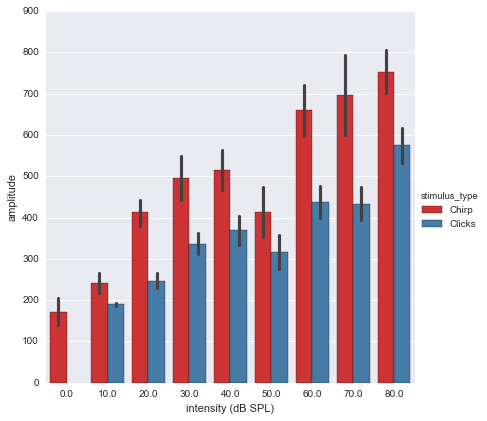

In [1]:
%pylab inline
import os
import os.path as op
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# some, perhaps, relevant links/sources:
# http://stats.stackexchange.com/questions/24314/when-is-a-repeated-measures-anova-preferred-over-a-mixed-effects-model
# http://nbviewer.ipython.org/urls/umich.box.com/shared/static/6tfc1e0q6jincsv5pgfa.ipynb
# http://jpktd.blogspot.jp/2013/03/multiple-comparison-and-tukey-hsd-or_25.html
# http://statsmodels.sourceforge.net/devel/anova.html

resdir = '/Users/cplanting/ABR-vis/'
data_bera = pd.read_csv(op.join(resdir,'amp.csv'), sep=';',header=0)
print data_bera.head()

#bin data source: http://stackoverflow.com/questions/16947336/binning-a-dataframe-in-pandas-in-python
bins = np.linspace(5, 85, 9)
int_binned = data_bera.groupby(pd.cut(data_bera.intensity, bins))
def int_round(x,mult):
    #round to closest multiple of 10; 5.0 -> 0.0; 5.1 -> 10.0
    return np.round(x / mult) * mult

data_bera['intensity (dB SPL)'] = int_round(data_bera['intensity'],10.0)
g0 = sns.factorplot("intensity (dB SPL)","amplitude","stimulus_type",kind='bar',
                    ci=68,n_boot=50000, estimator=np.mean, 
                    data=tmp, size=6, palette="Set1")

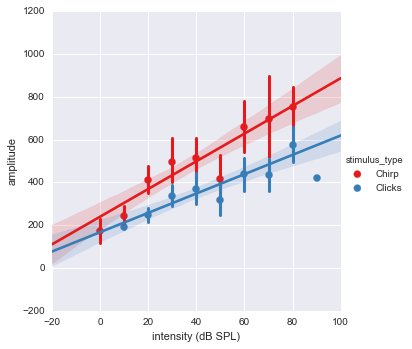

In [5]:
g = sns.lmplot(x="intensity (dB SPL)", y="amplitude", hue="stimulus_type", x_estimator=np.mean, data=data_bera,
               y_jitter=10,palette="Set1")

(0, 12)

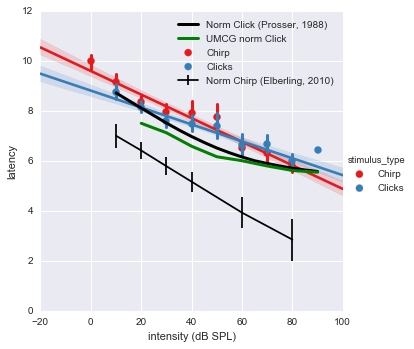

In [16]:
g = sns.lmplot(x="intensity (dB SPL)", y="latency", hue="stimulus_type", x_estimator=np.mean, data=data_bera,
               x_jitter=4,palette="Set1")
level = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
lat = [8.73,8.42,8.12,7.82,7.52,7.24,6.98,6.74,6.52,6.33,6.16,6.01,5.9,5.8,5.71,5.64,5.58]
level2 = [20,30,40,50,60,70,80,90]
lat2 = [7.51, 7.13, 6.59, 6.17, 6.01, 5.8, 5.62, 5.55]
lat2_sd = [0.42, 0.37, 0.43, 0.27, 0.27, 0.2, 0.12,0.12]
plot(level,lat,'k-',lw=3,label='Norm Click (Prosser, 1988)')
plot(level2,lat2,'g-',lw=3,label='UMCG norm Click')

lev_chirp = [10,20,30,40,60,80]
lat_chirp = [7.01, 6.42, 5.79, 5.17, 3.93, 2.85]
sd_chirp = [0.49, 0.36, 0.35, 0.40, 0.62, 0.84]
errorbar(lev_chirp,lat_chirp,yerr=sd_chirp,color='k',label='Norm Chirp (Elberling, 2010)')
legend()
g.ax.set_ylim([0,12])

In [11]:
model = sm.MixedLM.from_formula("amplitude ~ intensity * stimulus_type", tmp, groups=tmp["sub_id"])
result = model.fit()
print result.summary()

                       Mixed Linear Model Regression Results
Model:                      MixedLM         Dependent Variable:         amplitude 
No. Observations:           291             Method:                     REML      
No. Groups:                 16              Scale:                      15421.7194
Min. group size:            3               Likelihood:                 -1834.6913
Max. group size:            29              Converged:                  Yes       
Mean group size:            18.2                                                  
----------------------------------------------------------------------------------
                                    Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
----------------------------------------------------------------------------------
Intercept                            95.938   53.345  1.798 0.072   -8.616 200.492
stimulus_type[T.Clicks]            -108.567   35.500 -3.058 0.002 -178.145 -38.989
intensity                 

In [28]:
model = sm.MixedLM.from_formula("latency ~ intensity * stimulus_type", tmp, groups=tmp["sub_id"])
result = model.fit()
print result.summary()

                    Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        latency  
No. Observations:         291            Method:                    REML     
No. Groups:               16             Scale:                     0.1906   
Min. group size:          3              Likelihood:                -214.5807
Max. group size:          29             Converged:                 Yes      
Mean group size:          18.2                                               
-----------------------------------------------------------------------------
                                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                          9.995    0.205  48.702 0.000  9.592 10.397
stimulus_type[T.Clicks]           -0.587    0.125  -4.706 0.000 -0.832 -0.343
intensity                         -0.053    0.002 -31.782 0.000 -0.056 -0.049
intens

In [26]:
model_anova = ols('latency ~ stimulus_type*intensity',data=tmp).fit()
table = sm.stats.anova_lm(model_anova, typ=2) # Type 2 ANOVA DataFrame
print model_anova.summary()
print table
#interestingly, by using plain ANOVA (without repeated measures), the effect dissolve in the between-subject variance! 
#therefor use MixedLM

                            OLS Regression Results                            
Dep. Variable:                latency   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     122.1
Date:                Thu, 03 Dec 2015   Prob (F-statistic):           5.73e-51
Time:                        21:36:15   Log-Likelihood:                -354.79
No. Observations:                 291   AIC:                             717.6
Df Residuals:                     287   BIC:                             732.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Interc

In [22]:
spect_file = '/Users/cplanting/ProjectsScience/ABR/raw_data/spectrum_click_chirp_bone.csv'
spectrum_df = pd.read_csv(spect_file,sep=';',header=0,decimal=',')
#spectrum_df.head

<bound method DataFrame.head of           f  WN  click  chirp
0      12.5  15   12.5   20.0
1      16.0   6    3.5   13.0
2      20.0   6   -3.0    0.0
3      25.0  -1   -8.5   -7.0
4      31.5  -5   -5.0   -7.0
5      40.0   2    1.5   -5.0
6      50.0   3   -7.0   -9.0
7      63.0   7  -12.0  -10.0
8      80.0  15    3.0  -10.0
9     100.0  19   -3.2  -12.0
10    125.0  25   10.5  -10.0
11    160.0  30   15.8   -9.0
12    200.0  35   20.0    0.0
13    250.0  41   26.8    9.0
14    315.0  48   33.3   30.0
15    400.0  55   41.5   43.0
16    500.0  57   43.5   46.0
17    630.0  55   40.3   43.0
18    800.0  53   38.1   40.5
19   1000.0  52   37.4   40.5
20   1250.0  52   38.2   42.0
21   1600.0  53   39.1   42.0
22   2000.0  50   36.8   40.0
23   2500.0  48   33.3   36.0
24   3150.0  47   31.0   35.0
25   4000.0  45   29.5   35.0
26   5000.0  36   19.0   24.0
27   6300.0  30   10.5   17.0
28   8000.0  27    6.0   15.0
29  10000.0  24    5.5   12.0
30  12500.0  16    6.5    7.0
31  1600

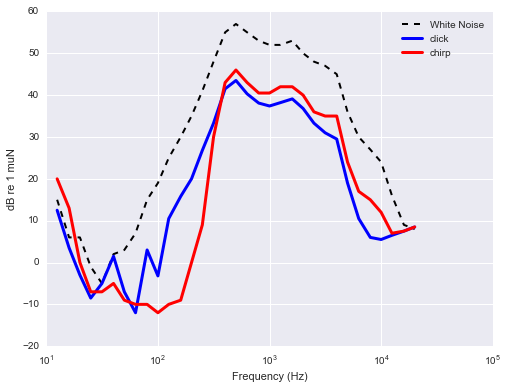

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
semilogx(spectrum_df.f,spectrum_df.WN,'k--',lw=2,label='White Noise')
semilogx(spectrum_df.f,spectrum_df.click,'b-',lw=3,label='click')
semilogx(spectrum_df.f,spectrum_df.chirp,'r-',lw=3,label='chirp')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('dB re 1 muN')
plt.legend()

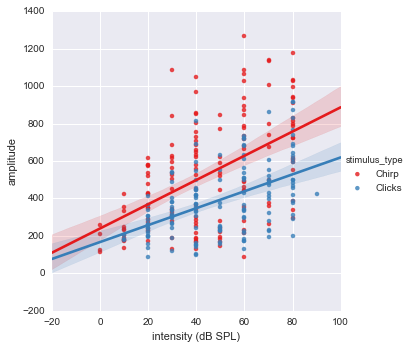

In [4]:
# now same but with individual point
g = sns.lmplot(x="intensity (dB SPL)", y="amplitude", hue="stimulus_type", order=1,data=data_bera,
               y_jitter=10,palette="Set1")

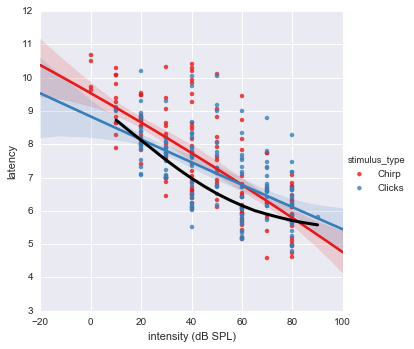

In [3]:
g = sns.lmplot(x="intensity (dB SPL)", y="latency", hue="stimulus_type", order=2,data=data_bera,
               y_jitter=1,palette="Set1")

#Prosser Arslan 1998
level = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
lat = [8.73,8.42,8.12,7.82,7.52,7.24,6.98,6.74,6.52,6.33,6.16,6.01,5.9,5.8,5.71,5.64,5.58]
level2 = [20,30,40,50,60,70,80,90]

#http://www.baaudiology.org/files/9313/8597/9894/R_04_Abeir_Osman_-_Characteristics_of_Auditory_Brainstem_Response.pdf
lat2 = [7.51, 7.13, 6.59, 6.17, 6.01, 5.8, 5.62, 5.55]
lat2_sd = [0.42, 0.37, 0.43, 0.27, 0.27, 0.2, 0.12,0.12]
plot(level,lat,'k-',lw=3,label='Prosser, 1988')